In [1]:
import numpy as np
import pandas as pd
import cv2

In [2]:
seed = 1234

# Load images and feature extraction

In [3]:
import glob

In [4]:
doubleFiles = np.array(glob.glob("./DATASET/DOUBLE/*.dat"))
envelopeFiles = np.array(glob.glob("./DATASET/ENVELOPE/*.dat"))
otherFiles = np.array(glob.glob("./DATASET/OTHER/*.dat"))
parcelFiles = np.array(glob.glob("./DATASET/PARCEL/*.dat"))

allFiles = np.concatenate((doubleFiles, envelopeFiles, parcelFiles));

print("Double: ",doubleFiles.size)
print("Envelope: ",envelopeFiles.size)
print("Other: ",otherFiles.size)
print("Parcel: ",parcelFiles.size)
print("Tot: ",allFiles.size)

Double:  471
Envelope:  879
Other:  58
Parcel:  702
Tot:  2052


In [5]:
def preprocessImage(imgPath):
    return cv2.resize(np.loadtxt(imgPath), dsize = (50,50)).flatten();
    
    

In [6]:
imgSize = 50;

nImages = allFiles.shape[0];
images = np.empty((nImages, imgSize*imgSize+3));

index = 1;
for fileName in doubleFiles:
    img = preprocessImage(fileName)
    images[index-1] = np.concatenate((img, np.array([1.0, 0.0, 0.0])))
    print(index,"/",nImages,end="\r");
    index +=1;
    
for fileName in envelopeFiles:
    img = preprocessImage(fileName)
    images[index-1] = np.concatenate((img, np.array([0.0, 1.0, 0.0])))
    print(index,"/",nImages,end="\r");
    index +=1;
    
for fileName in parcelFiles:
    img = preprocessImage(fileName)
    images[index-1] = np.concatenate((img, np.array([0.0, 0.0, 1.0])))
    print(index,"/",nImages,end="\r");
    index +=1;

In [7]:
def getDF():
    df = pd.DataFrame(data=images);
    
    return df;
df = getDF()
df = df.sample(frac=1, random_state=seed).reset_index(drop=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000862,0.001636,0.017129,0.017378,0.040854,0.048695,0.035634,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0


In [8]:
df[2503] = 1*df[2500]+ 2*df[2501]+ 3*df[2502]-1;

In [9]:
df[2500] = df[2503]
df.drop(2503, axis=1, inplace=True)
df.drop(2502, axis=1, inplace=True)
df.drop(2501, axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013261,0.012037,0.000862,0.001636,0.017129,0.017378,0.040854,0.048695,0.035634,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030154,0.014221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0


In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013261,0.012037,0.000862,0.001636,0.017129,0.017378,0.040854,0.048695,0.035634,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030154,0.014221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0


# Training

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

# import regularizer
from tensorflow.keras.regularizers import l1_l2


In [12]:
X_train, X_eval, y_train, y_eval = train_test_split(
    df.drop(2500, axis=1, inplace=False).values.reshape(nImages,50,50,1), df.loc[:,2500], test_size=0.333, random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=seed)


In [13]:
cnnInput = Input(shape=(50,50,1), name="input")
model = Conv2D(filters=128, kernel_size=(5,5), activation = 'relu',activity_regularizer=l1_l2(l1=0.001, l2=0.001))(cnnInput)
model = MaxPooling2D(pool_size = (2, 2))(model)
model = Dropout(rate = 0.5)(model)

model = Conv2D(filters=64, kernel_size=(3,3), activation = 'relu',activity_regularizer=l1_l2(l1=0.001, l2=0.001))(cnnInput)
model = MaxPooling2D(pool_size = (2, 2))(model)
model = Dropout(rate = 0.6)(model)

model = Flatten()(model)
model = Dense(units = 128, activation = 'relu',activity_regularizer=l1_l2(l1=0.001, l2=0.001))(model)
model = Dropout(rate = 0.6)(model)
model = Dense(units = 64, activation = 'relu',activity_regularizer=l1_l2(l1=0.001, l2=0.001))(model)
model = Dropout(rate = 0.5)(model)

model = Dense(units = 32, activation = 'sigmoid',activity_regularizer=l1_l2(l1=0.001, l2=0.001))(model)

preds = Dense(units = 3, activation = 'softmax', name='output')(model)

model = Model(inputs=cnnInput, outputs=preds)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
bestModelLoss = 9999.0;
sensitivity = 0.001
lastBestIter = 0;

for i in range(1,999):
    hist = model.fit(X_train, y_train.values, validation_data=(X_test, y_test.values), batch_size=128)
    
    predictions = model.predict(X_eval)
    classes = np.argmax(predictions, axis=1)
    print(np.mean(classes == y_eval))
    
    valLoss = hist.history['val_loss'][0]
    if valLoss < bestModelLoss -  sensitivity:
        bestModelLoss = valLoss
        lastBestIter = i
        model.save('bestModel.h5')
    
    print(i - lastBestIter)
    if i > lastBestIter+30:
        print("Model didn't improve in the last 30 epochs.. break")
        break;

model = load_model('bestModel.h5')

Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 3s 3ms/sample - loss: 2.4184 - acc: 0.3391 - val_loss: 1.7904 - val_acc: 0.3723
0.3347953216374269
0
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 1.6522 - acc: 0.3391 - val_loss: 1.3247 - val_acc: 0.3723
0.3347953216374269
0
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 1.3039 - acc: 0.3391 - val_loss: 1.1370 - val_acc: 0.3723
0.3347953216374269
0
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 1.1631 - acc: 0.3428 - val_loss: 1.0630 - val_acc: 0.3723
0.3347953216374269
0
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 1.0983 - acc: 0.5585 - val_loss: 1.0364 - val_acc: 0.5912
0.5994152046783626
0
Train on 1094 samples, validate on 

1094/1094 [==============================] - 2s 2ms/sample - loss: 0.3097 - acc: 0.9232 - val_loss: 0.4467 - val_acc: 0.8832
0.8230994152046783
3
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 0.3134 - acc: 0.9324 - val_loss: 0.4362 - val_acc: 0.8869
0.827485380116959
0
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 0.2954 - acc: 0.9378 - val_loss: 0.4501 - val_acc: 0.8796
0.8216374269005848
1
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 0.2966 - acc: 0.9397 - val_loss: 0.4899 - val_acc: 0.8650
0.8172514619883041
2
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 0.2833 - acc: 0.9479 - val_loss: 0.4472 - val_acc: 0.8832
0.8201754385964912
3
Train on 1094 samples, validate on 274 samples
1094/1094 [=========================

1094/1094 [==============================] - 2s 2ms/sample - loss: 0.1505 - acc: 0.9762 - val_loss: 0.4542 - val_acc: 0.8869
0.8245614035087719
22
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 0.1364 - acc: 0.9872 - val_loss: 0.4629 - val_acc: 0.8759
0.8099415204678363
23
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 0.1383 - acc: 0.9909 - val_loss: 0.4471 - val_acc: 0.8905
0.8260233918128655
24
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 0.1355 - acc: 0.9817 - val_loss: 0.4584 - val_acc: 0.8796
0.827485380116959
25
Train on 1094 samples, validate on 274 samples
1094/1094 [==============================] - 2s 2ms/sample - loss: 0.1404 - acc: 0.9835 - val_loss: 0.4554 - val_acc: 0.8905
0.8260233918128655
26
Train on 1094 samples, validate on 274 samples
1094/1094 [====================

In [16]:
predictions = model.predict(X_eval)
classes = np.argmax(predictions, axis=1)

In [17]:
classes

array([1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0,
       1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0,
       1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1,
       2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2,
       2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2,

In [18]:
np.mean(classes == y_eval)

0.827485380116959

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_true=y_eval, y_pred=classes)

array([[108,  29,  21],
       [ 22, 265,  10],
       [  4,  32, 193]])

## Data augmentation 

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator;

In [22]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range= 0,
    horizontal_flip=True,
    vertical_flip=True)

datagen.fit(X_train)

In [23]:
cnnInput = Input(shape=(50,50,1), name="input")

model = Conv2D(filters=128, kernel_size=(5,5), activation = 'relu',activity_regularizer=l1_l2(l1=0.00001, l2=0.00001))(cnnInput)
model = MaxPooling2D(pool_size = (2, 2))(model)
model = Dropout(rate = 0.5)(model)

model = Conv2D(filters=64, kernel_size=(3,3), activation = 'relu',activity_regularizer=l1_l2(l1=0.00001, l2=0.00001))(cnnInput)
model = MaxPooling2D(pool_size = (2, 2))(model)
model = Dropout(rate = 0.5)(model)

model = Flatten()(model)
model = Dense(units = 256, activation = 'relu',activity_regularizer=l1_l2(l1=0.00001, l2=0.00001))(model)
model = Dropout(rate = 0.5)(model)
model = Dense(units = 128, activation = 'relu',activity_regularizer=l1_l2(l1=0.00001, l2=0.00001))(model)
model = Dropout(rate = 0.5)(model)

model = Dense(units = 32, activation = 'sigmoid',activity_regularizer=l1_l2(l1=0.00001, l2=0.00001))(model)

preds = Dense(units = 3, activation = 'softmax', name='output')(model)

model = Model(inputs=cnnInput, outputs=preds)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
bestModelLoss = 9999.0;
sensitivity = 0.001
lastBestIter = 0;

for i in range(1,9999):
    hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128), epochs=1, validation_data=(X_test, y_test.values))
    
    predictions = model.predict(X_eval)
    classes = np.argmax(predictions, axis=1)
    print(np.mean(classes == y_eval))
    
    valLoss = hist.history['val_loss'][0]
    if valLoss < bestModelLoss -  sensitivity:
        bestModelLoss = valLoss
        lastBestIter = i
        model.save('bestModel.h5')
    
    print(i - lastBestIter)
    if i > lastBestIter+30:
        print("Model didn't improve in the last 30 epochs.. break")
        break;

model = load_model('bestModel.h5')

9/9 [==============================] - 4s 406ms/step - loss: 1.0281 - acc: 0.4452 - val_loss: 0.8504 - val_acc: 0.7190
0.6359649122807017
0
9/9 [==============================] - 3s 283ms/step - loss: 0.8545 - acc: 0.6654 - val_loss: 0.7008 - val_acc: 0.7299
0.6637426900584795
0
9/9 [==============================] - 3s 296ms/step - loss: 0.7748 - acc: 0.6709 - val_loss: 0.6652 - val_acc: 0.7372
0.6652046783625731
0
9/9 [==============================] - 3s 291ms/step - loss: 0.7611 - acc: 0.6828 - val_loss: 0.6702 - val_acc: 0.7409
0.6812865497076024
1
9/9 [==============================] - 2s 276ms/step - loss: 0.7375 - acc: 0.6920 - val_loss: 0.6509 - val_acc: 0.7555
0.6973684210526315
0
9/9 [==============================] - 3s 326ms/step - loss: 0.7001 - acc: 0.7176 - val_loss: 0.6121 - val_acc: 0.7555
0.7017543859649122
0
9/9 [==============================] - 3s 315ms/step - loss: 0.6819 - acc: 0.7157 - val_loss: 0.5593 - val_acc: 0.7664
0.7017543859649122
0
274/9 [=============

9/9 [==============================] - 3s 290ms/step - loss: 0.6723 - acc: 0.7230 - val_loss: 0.5662 - val_acc: 0.7445
0.7178362573099415
1
9/9 [==============================] - 3s 300ms/step - loss: 0.6581 - acc: 0.7386 - val_loss: 0.5148 - val_acc: 0.7591
0.7339181286549707
0
9/9 [==============================] - 3s 288ms/step - loss: 0.6283 - acc: 0.7495 - val_loss: 0.5613 - val_acc: 0.7664
0.7441520467836257
1
9/9 [==============================] - 3s 292ms/step - loss: 0.6288 - acc: 0.7532 - val_loss: 0.4804 - val_acc: 0.7774
0.7266081871345029
0
9/9 [==============================] - 3s 305ms/step - loss: 0.6158 - acc: 0.7532 - val_loss: 0.5408 - val_acc: 0.7664
0.7149122807017544
1
9/9 [==============================] - 3s 285ms/step - loss: 0.6043 - acc: 0.7578 - val_loss: 0.4797 - val_acc: 0.7920
0.7441520467836257
2
9/9 [==============================] - 3s 290ms/step - loss: 0.6217 - acc: 0.7541 - val_loss: 0.4699 - val_acc: 0.7847
0.7514619883040936
0
9/9 [===============

9/9 [==============================] - 3s 283ms/step - loss: 0.5763 - acc: 0.7623 - val_loss: 0.4583 - val_acc: 0.7737
0.7587719298245614
0
9/9 [==============================] - 3s 297ms/step - loss: 0.5870 - acc: 0.7642 - val_loss: 0.4729 - val_acc: 0.7810
0.7602339181286549
1
9/9 [==============================] - 3s 303ms/step - loss: 0.5803 - acc: 0.7623 - val_loss: 0.4347 - val_acc: 0.8175
0.7573099415204678
0
9/9 [==============================] - 3s 283ms/step - loss: 0.5764 - acc: 0.7779 - val_loss: 0.4404 - val_acc: 0.7920
0.7763157894736842
1
9/9 [==============================] - 3s 298ms/step - loss: 0.5683 - acc: 0.7733 - val_loss: 0.4229 - val_acc: 0.8029
0.7646198830409356
0
9/9 [==============================] - 3s 287ms/step - loss: 0.5520 - acc: 0.7815 - val_loss: 0.4730 - val_acc: 0.8102
0.7587719298245614
1
9/9 [==============================] - 3s 286ms/step - loss: 0.5680 - acc: 0.7861 - val_loss: 0.4199 - val_acc: 0.8139
0.77046783625731
0
9/9 [=================

9/9 [==============================] - 3s 307ms/step - loss: 0.5525 - acc: 0.7907 - val_loss: 0.4133 - val_acc: 0.8321
0.7690058479532164
0
9/9 [==============================] - 3s 297ms/step - loss: 0.5571 - acc: 0.7916 - val_loss: 0.4281 - val_acc: 0.8139
0.7573099415204678
1
9/9 [==============================] - 3s 279ms/step - loss: 0.5628 - acc: 0.7797 - val_loss: 0.4447 - val_acc: 0.7920
0.7763157894736842
2
9/9 [==============================] - 3s 297ms/step - loss: 0.5558 - acc: 0.7843 - val_loss: 0.4113 - val_acc: 0.8358
0.7777777777777778
0
9/9 [==============================] - 3s 292ms/step - loss: 0.5260 - acc: 0.7898 - val_loss: 0.4040 - val_acc: 0.8358
0.7777777777777778
0
9/9 [==============================] - 3s 302ms/step - loss: 0.5259 - acc: 0.7952 - val_loss: 0.4065 - val_acc: 0.8285
0.7763157894736842
1
9/9 [==============================] - 3s 294ms/step - loss: 0.5224 - acc: 0.8007 - val_loss: 0.3987 - val_acc: 0.8394
0.7748538011695907
0
9/9 [===============

9/9 [==============================] - 3s 289ms/step - loss: 0.5097 - acc: 0.8126 - val_loss: 0.3871 - val_acc: 0.8394
0.7792397660818714
0
9/9 [==============================] - 3s 287ms/step - loss: 0.5255 - acc: 0.8144 - val_loss: 0.3816 - val_acc: 0.8394
0.7894736842105263
0
9/9 [==============================] - 3s 292ms/step - loss: 0.5036 - acc: 0.8163 - val_loss: 0.3741 - val_acc: 0.8431
0.7923976608187134
0
9/9 [==============================] - 3s 301ms/step - loss: 0.5009 - acc: 0.8181 - val_loss: 0.3817 - val_acc: 0.8321
0.7923976608187134
1
9/9 [==============================] - 3s 291ms/step - loss: 0.5036 - acc: 0.8071 - val_loss: 0.3680 - val_acc: 0.8540
0.7880116959064327
0
9/9 [==============================] - 3s 299ms/step - loss: 0.4922 - acc: 0.8236 - val_loss: 0.3882 - val_acc: 0.8248
0.783625730994152
1
9/9 [==============================] - 3s 298ms/step - loss: 0.5094 - acc: 0.7989 - val_loss: 0.3774 - val_acc: 0.8321
0.7850877192982456
2
9/9 [================

9/9 [==============================] - 3s 290ms/step - loss: 0.5015 - acc: 0.8117 - val_loss: 0.3885 - val_acc: 0.8467
0.7894736842105263
4
9/9 [==============================] - 3s 295ms/step - loss: 0.5071 - acc: 0.8035 - val_loss: 0.3971 - val_acc: 0.8285
0.7894736842105263
5
9/9 [==============================] - 3s 296ms/step - loss: 0.4892 - acc: 0.8144 - val_loss: 0.4011 - val_acc: 0.8321
0.7953216374269005
6
9/9 [==============================] - 3s 284ms/step - loss: 0.4925 - acc: 0.8254 - val_loss: 0.3963 - val_acc: 0.8139
0.783625730994152
7
9/9 [==============================] - 3s 302ms/step - loss: 0.5005 - acc: 0.8053 - val_loss: 0.3660 - val_acc: 0.8431
0.7850877192982456
0
9/9 [==============================] - 3s 311ms/step - loss: 0.4859 - acc: 0.8099 - val_loss: 0.3691 - val_acc: 0.8504
0.7997076023391813
1
9/9 [==============================] - 3s 294ms/step - loss: 0.4585 - acc: 0.8318 - val_loss: 0.3669 - val_acc: 0.8467
0.7865497076023392
2
9/9 [================

9/9 [==============================] - 3s 297ms/step - loss: 0.4792 - acc: 0.8190 - val_loss: 0.3749 - val_acc: 0.8504
0.7953216374269005
1
9/9 [==============================] - 3s 292ms/step - loss: 0.4675 - acc: 0.8181 - val_loss: 0.3510 - val_acc: 0.8540
0.7967836257309941
0
9/9 [==============================] - 3s 299ms/step - loss: 0.4382 - acc: 0.8373 - val_loss: 0.3668 - val_acc: 0.8540
0.7997076023391813
1
9/9 [==============================] - 3s 305ms/step - loss: 0.4694 - acc: 0.8199 - val_loss: 0.3529 - val_acc: 0.8540
0.804093567251462
2
9/9 [==============================] - 3s 300ms/step - loss: 0.4596 - acc: 0.8391 - val_loss: 0.3412 - val_acc: 0.8613
0.814327485380117
0
9/9 [==============================] - 3s 305ms/step - loss: 0.4482 - acc: 0.8309 - val_loss: 0.3394 - val_acc: 0.8613
0.8084795321637427
0
9/9 [==============================] - 3s 311ms/step - loss: 0.4512 - acc: 0.8391 - val_loss: 0.3304 - val_acc: 0.8577
0.8070175438596491
0
9/9 [=================

9/9 [==============================] - 3s 293ms/step - loss: 0.4388 - acc: 0.8410 - val_loss: 0.3330 - val_acc: 0.8723
0.8055555555555556
2
9/9 [==============================] - 3s 286ms/step - loss: 0.4363 - acc: 0.8446 - val_loss: 0.3599 - val_acc: 0.8613
0.8084795321637427
3
9/9 [==============================] - 3s 294ms/step - loss: 0.4249 - acc: 0.8464 - val_loss: 0.3421 - val_acc: 0.8686
0.8055555555555556
4
9/9 [==============================] - 3s 281ms/step - loss: 0.4190 - acc: 0.8419 - val_loss: 0.3280 - val_acc: 0.8577
0.8114035087719298
0
9/9 [==============================] - 3s 290ms/step - loss: 0.4328 - acc: 0.8355 - val_loss: 0.3529 - val_acc: 0.8577
0.814327485380117
1
9/9 [==============================] - 3s 292ms/step - loss: 0.4247 - acc: 0.8346 - val_loss: 0.3965 - val_acc: 0.8650
0.8114035087719298
2
9/9 [==============================] - 3s 295ms/step - loss: 0.4417 - acc: 0.8373 - val_loss: 0.3654 - val_acc: 0.8540
0.8084795321637427
3
9/9 [================

9/9 [==============================] - 3s 292ms/step - loss: 0.4232 - acc: 0.8373 - val_loss: 0.3250 - val_acc: 0.8796
0.8099415204678363
0
9/9 [==============================] - 3s 295ms/step - loss: 0.4214 - acc: 0.8437 - val_loss: 0.3645 - val_acc: 0.8759
0.8172514619883041
1
9/9 [==============================] - 3s 283ms/step - loss: 0.4147 - acc: 0.8400 - val_loss: 0.3264 - val_acc: 0.8650
0.8157894736842105
2
9/9 [==============================] - 3s 301ms/step - loss: 0.4060 - acc: 0.8455 - val_loss: 0.3355 - val_acc: 0.8759
0.8260233918128655
3
9/9 [==============================] - 3s 302ms/step - loss: 0.4228 - acc: 0.8373 - val_loss: 0.3255 - val_acc: 0.8723
0.827485380116959
4
9/9 [==============================] - 3s 301ms/step - loss: 0.4087 - acc: 0.8428 - val_loss: 0.3790 - val_acc: 0.8650
0.8289473684210527
5
9/9 [==============================] - 3s 293ms/step - loss: 0.4077 - acc: 0.8501 - val_loss: 0.3395 - val_acc: 0.8759
0.8187134502923976
6
9/9 [================

9/9 [==============================] - 3s 317ms/step - loss: 0.3922 - acc: 0.8556 - val_loss: 0.3355 - val_acc: 0.8650
0.8260233918128655
8
9/9 [==============================] - 3s 301ms/step - loss: 0.3996 - acc: 0.8492 - val_loss: 0.3346 - val_acc: 0.8759
0.8157894736842105
9
9/9 [==============================] - 3s 296ms/step - loss: 0.3926 - acc: 0.8556 - val_loss: 0.3487 - val_acc: 0.8832
0.8289473684210527
10
9/9 [==============================] - 3s 299ms/step - loss: 0.4092 - acc: 0.8501 - val_loss: 0.3217 - val_acc: 0.8723
0.814327485380117
0
9/9 [==============================] - 3s 297ms/step - loss: 0.4025 - acc: 0.8446 - val_loss: 0.3375 - val_acc: 0.8613
0.8230994152046783
1
9/9 [==============================] - 3s 292ms/step - loss: 0.3850 - acc: 0.8528 - val_loss: 0.3678 - val_acc: 0.8613
0.827485380116959
2
9/9 [==============================] - 3s 301ms/step - loss: 0.3965 - acc: 0.8583 - val_loss: 0.3284 - val_acc: 0.8613
0.8347953216374269
3
9/9 [================

9/9 [==============================] - 3s 293ms/step - loss: 0.3797 - acc: 0.8611 - val_loss: 0.3170 - val_acc: 0.8723
0.8333333333333334
0
9/9 [==============================] - 3s 300ms/step - loss: 0.3909 - acc: 0.8601 - val_loss: 0.3846 - val_acc: 0.8613
0.8128654970760234
1
9/9 [==============================] - 3s 287ms/step - loss: 0.3936 - acc: 0.8601 - val_loss: 0.3537 - val_acc: 0.8796
0.827485380116959
2
9/9 [==============================] - 3s 292ms/step - loss: 0.3839 - acc: 0.8574 - val_loss: 0.3289 - val_acc: 0.8759
0.8230994152046783
3
9/9 [==============================] - 3s 308ms/step - loss: 0.3809 - acc: 0.8583 - val_loss: 0.3055 - val_acc: 0.8832
0.8289473684210527
0
9/9 [==============================] - 3s 304ms/step - loss: 0.3753 - acc: 0.8583 - val_loss: 0.3179 - val_acc: 0.8796
0.8318713450292398
1
9/9 [==============================] - 3s 294ms/step - loss: 0.3746 - acc: 0.8592 - val_loss: 0.3051 - val_acc: 0.8796
0.8318713450292398
2
9/9 [================

9/9 [==============================] - 3s 306ms/step - loss: 0.3676 - acc: 0.8720 - val_loss: 0.3181 - val_acc: 0.8723
0.8347953216374269
4
9/9 [==============================] - 3s 285ms/step - loss: 0.3710 - acc: 0.8583 - val_loss: 0.3487 - val_acc: 0.8796
0.8318713450292398
5
9/9 [==============================] - 3s 293ms/step - loss: 0.3780 - acc: 0.8693 - val_loss: 0.3075 - val_acc: 0.8796
0.8260233918128655
6
9/9 [==============================] - 3s 303ms/step - loss: 0.3616 - acc: 0.8638 - val_loss: 0.3483 - val_acc: 0.8613
0.8289473684210527
7
9/9 [==============================] - 3s 302ms/step - loss: 0.3574 - acc: 0.8675 - val_loss: 0.3377 - val_acc: 0.8796
0.8333333333333334
8
9/9 [==============================] - 3s 301ms/step - loss: 0.3644 - acc: 0.8647 - val_loss: 0.2905 - val_acc: 0.8869
0.8318713450292398
0
9/9 [==============================] - 3s 291ms/step - loss: 0.3634 - acc: 0.8675 - val_loss: 0.3118 - val_acc: 0.8832
0.8391812865497076
1
9/9 [===============

9/9 [==============================] - 3s 292ms/step - loss: 0.3633 - acc: 0.8556 - val_loss: 0.2977 - val_acc: 0.8905
0.8391812865497076
3
9/9 [==============================] - 3s 293ms/step - loss: 0.3614 - acc: 0.8611 - val_loss: 0.3061 - val_acc: 0.8796
0.8435672514619883
4
9/9 [==============================] - 3s 294ms/step - loss: 0.3592 - acc: 0.8583 - val_loss: 0.3075 - val_acc: 0.8759
0.8362573099415205
5
9/9 [==============================] - 3s 300ms/step - loss: 0.3712 - acc: 0.8565 - val_loss: 0.3161 - val_acc: 0.8759
0.8304093567251462
6
9/9 [==============================] - 3s 291ms/step - loss: 0.3569 - acc: 0.8565 - val_loss: 0.3058 - val_acc: 0.8723
0.827485380116959
7
9/9 [==============================] - 3s 308ms/step - loss: 0.3656 - acc: 0.8574 - val_loss: 0.2959 - val_acc: 0.8869
0.8362573099415205
8
9/9 [==============================] - 3s 306ms/step - loss: 0.3548 - acc: 0.8638 - val_loss: 0.3105 - val_acc: 0.8650
0.8347953216374269
9
9/9 [================

9/9 [==============================] - 3s 314ms/step - loss: 0.3431 - acc: 0.8720 - val_loss: 0.3539 - val_acc: 0.8759
0.8377192982456141
11
9/9 [==============================] - 3s 304ms/step - loss: 0.3720 - acc: 0.8647 - val_loss: 0.2908 - val_acc: 0.8832
0.8421052631578947
12
9/9 [==============================] - 3s 292ms/step - loss: 0.3436 - acc: 0.8748 - val_loss: 0.2704 - val_acc: 0.8869
0.8450292397660819
0
9/9 [==============================] - 3s 325ms/step - loss: 0.3451 - acc: 0.8693 - val_loss: 0.2805 - val_acc: 0.8942
0.8406432748538012
1
9/9 [==============================] - 3s 292ms/step - loss: 0.3477 - acc: 0.8766 - val_loss: 0.2877 - val_acc: 0.8832
0.8450292397660819
2
9/9 [==============================] - 3s 292ms/step - loss: 0.3439 - acc: 0.8784 - val_loss: 0.2901 - val_acc: 0.8796
0.8464912280701754
3
9/9 [==============================] - 3s 283ms/step - loss: 0.3310 - acc: 0.8766 - val_loss: 0.2728 - val_acc: 0.8905
0.8435672514619883
4
9/9 [=============

9/9 [==============================] - 3s 300ms/step - loss: 0.3373 - acc: 0.8729 - val_loss: 0.2828 - val_acc: 0.8869
0.8464912280701754
6
9/9 [==============================] - 3s 290ms/step - loss: 0.3357 - acc: 0.8693 - val_loss: 0.3212 - val_acc: 0.8650
0.8391812865497076
7
9/9 [==============================] - 3s 295ms/step - loss: 0.3325 - acc: 0.8729 - val_loss: 0.2827 - val_acc: 0.8832
0.847953216374269
8
9/9 [==============================] - 3s 305ms/step - loss: 0.3481 - acc: 0.8757 - val_loss: 0.3271 - val_acc: 0.8942
0.8421052631578947
9
9/9 [==============================] - 3s 297ms/step - loss: 0.3332 - acc: 0.8812 - val_loss: 0.2755 - val_acc: 0.8869
0.8464912280701754
10
9/9 [==============================] - 3s 295ms/step - loss: 0.3376 - acc: 0.8803 - val_loss: 0.2912 - val_acc: 0.8796
0.8391812865497076
11
9/9 [==============================] - 3s 297ms/step - loss: 0.3292 - acc: 0.8693 - val_loss: 0.2714 - val_acc: 0.8942
0.8523391812865497
12
9/9 [=============

9/9 [==============================] - 3s 295ms/step - loss: 0.3391 - acc: 0.8748 - val_loss: 0.2756 - val_acc: 0.8942
0.8435672514619883
14
9/9 [==============================] - 3s 301ms/step - loss: 0.3320 - acc: 0.8748 - val_loss: 0.2808 - val_acc: 0.8869
0.8421052631578947
15
9/9 [==============================] - 3s 303ms/step - loss: 0.3448 - acc: 0.8729 - val_loss: 0.2837 - val_acc: 0.8905
0.8333333333333334
16
9/9 [==============================] - 3s 289ms/step - loss: 0.3417 - acc: 0.8675 - val_loss: 0.2693 - val_acc: 0.8905
0.8391812865497076
0
9/9 [==============================] - 3s 305ms/step - loss: 0.3424 - acc: 0.8720 - val_loss: 0.2889 - val_acc: 0.8796
0.8362573099415205
1
9/9 [==============================] - 3s 299ms/step - loss: 0.3399 - acc: 0.8812 - val_loss: 0.3572 - val_acc: 0.8796
0.8318713450292398
2
9/9 [==============================] - 3s 290ms/step - loss: 0.3468 - acc: 0.8583 - val_loss: 0.2957 - val_acc: 0.8759
0.8421052631578947
3
9/9 [============

9/9 [==============================] - 3s 310ms/step - loss: 0.3178 - acc: 0.8839 - val_loss: 0.2573 - val_acc: 0.8905
0.8523391812865497
0
9/9 [==============================] - 3s 299ms/step - loss: 0.3136 - acc: 0.8949 - val_loss: 0.2649 - val_acc: 0.8905
0.8523391812865497
1
9/9 [==============================] - 3s 294ms/step - loss: 0.3397 - acc: 0.8803 - val_loss: 0.2601 - val_acc: 0.8978
0.8494152046783626
2
9/9 [==============================] - 3s 298ms/step - loss: 0.3100 - acc: 0.8857 - val_loss: 0.2995 - val_acc: 0.8978
0.8538011695906432
3
9/9 [==============================] - 3s 295ms/step - loss: 0.3289 - acc: 0.8729 - val_loss: 0.2524 - val_acc: 0.9015
0.8508771929824561
0
9/9 [==============================] - 3s 303ms/step - loss: 0.3036 - acc: 0.8766 - val_loss: 0.2662 - val_acc: 0.8905
0.8494152046783626
1
9/9 [==============================] - 3s 311ms/step - loss: 0.3174 - acc: 0.8839 - val_loss: 0.2702 - val_acc: 0.8942
0.8494152046783626
2
9/9 [===============

9/9 [==============================] - 3s 300ms/step - loss: 0.2982 - acc: 0.8876 - val_loss: 0.2716 - val_acc: 0.8942
0.8464912280701754
4
9/9 [==============================] - 3s 300ms/step - loss: 0.3016 - acc: 0.8848 - val_loss: 0.2664 - val_acc: 0.8905
0.8494152046783626
5
9/9 [==============================] - 3s 289ms/step - loss: 0.3133 - acc: 0.8821 - val_loss: 0.2660 - val_acc: 0.8978
0.8538011695906432
6
9/9 [==============================] - 3s 297ms/step - loss: 0.3255 - acc: 0.8720 - val_loss: 0.3187 - val_acc: 0.8869
0.8611111111111112
7
9/9 [==============================] - 3s 306ms/step - loss: 0.3081 - acc: 0.8793 - val_loss: 0.2512 - val_acc: 0.8978
0.8523391812865497
0
9/9 [==============================] - 3s 315ms/step - loss: 0.3116 - acc: 0.8885 - val_loss: 0.2684 - val_acc: 0.8942
0.8450292397660819
1
9/9 [==============================] - 3s 297ms/step - loss: 0.3004 - acc: 0.8821 - val_loss: 0.2693 - val_acc: 0.8978
0.847953216374269
2
9/9 [================

9/9 [==============================] - 3s 291ms/step - loss: 0.3103 - acc: 0.8793 - val_loss: 0.2732 - val_acc: 0.8905
0.8494152046783626
4
9/9 [==============================] - 3s 288ms/step - loss: 0.3114 - acc: 0.8876 - val_loss: 0.2685 - val_acc: 0.8942
0.8421052631578947
5
9/9 [==============================] - 3s 293ms/step - loss: 0.3084 - acc: 0.8848 - val_loss: 0.2663 - val_acc: 0.8978
0.8464912280701754
6
9/9 [==============================] - 3s 306ms/step - loss: 0.3135 - acc: 0.8912 - val_loss: 0.2556 - val_acc: 0.8905
0.8596491228070176
7
9/9 [==============================] - 3s 299ms/step - loss: 0.2892 - acc: 0.8949 - val_loss: 0.2686 - val_acc: 0.8905
0.8494152046783626
8
9/9 [==============================] - 3s 292ms/step - loss: 0.3009 - acc: 0.8812 - val_loss: 0.2497 - val_acc: 0.8978
0.8523391812865497
0
9/9 [==============================] - 3s 297ms/step - loss: 0.2917 - acc: 0.9004 - val_loss: 0.3108 - val_acc: 0.8978
0.847953216374269
1
9/9 [================

9/9 [==============================] - 3s 281ms/step - loss: 0.3211 - acc: 0.8848 - val_loss: 0.2679 - val_acc: 0.8905
0.8552631578947368
3
9/9 [==============================] - 3s 290ms/step - loss: 0.3075 - acc: 0.8894 - val_loss: 0.2434 - val_acc: 0.9015
0.8508771929824561
0
9/9 [==============================] - 3s 313ms/step - loss: 0.3142 - acc: 0.8867 - val_loss: 0.2461 - val_acc: 0.8942
0.8611111111111112
1
9/9 [==============================] - 3s 284ms/step - loss: 0.3071 - acc: 0.8894 - val_loss: 0.2510 - val_acc: 0.8869
0.8713450292397661
2
9/9 [==============================] - 3s 311ms/step - loss: 0.2900 - acc: 0.8985 - val_loss: 0.2535 - val_acc: 0.8905
0.8654970760233918
3
9/9 [==============================] - 3s 298ms/step - loss: 0.2851 - acc: 0.8885 - val_loss: 0.2445 - val_acc: 0.9015
0.8581871345029239
4
9/9 [==============================] - 3s 312ms/step - loss: 0.2924 - acc: 0.9031 - val_loss: 0.2513 - val_acc: 0.8869
0.8494152046783626
5
9/9 [===============

9/9 [==============================] - 3s 295ms/step - loss: 0.2652 - acc: 0.9049 - val_loss: 0.2530 - val_acc: 0.8942
0.8552631578947368
7
9/9 [==============================] - 3s 299ms/step - loss: 0.2997 - acc: 0.8867 - val_loss: 0.2519 - val_acc: 0.8978
0.847953216374269
8
9/9 [==============================] - 3s 296ms/step - loss: 0.2924 - acc: 0.8967 - val_loss: 0.2470 - val_acc: 0.9015
0.8552631578947368
9
9/9 [==============================] - 3s 310ms/step - loss: 0.3092 - acc: 0.8848 - val_loss: 0.3046 - val_acc: 0.9015
0.8508771929824561
10
9/9 [==============================] - 3s 291ms/step - loss: 0.3088 - acc: 0.8803 - val_loss: 0.2526 - val_acc: 0.8978
0.8552631578947368
11
9/9 [==============================] - 3s 301ms/step - loss: 0.3126 - acc: 0.8748 - val_loss: 0.2577 - val_acc: 0.9051
0.8567251461988304
12
9/9 [==============================] - 3s 297ms/step - loss: 0.2945 - acc: 0.8903 - val_loss: 0.2637 - val_acc: 0.8832
0.8523391812865497
13
9/9 [============

9/9 [==============================] - 3s 313ms/step - loss: 0.2767 - acc: 0.9068 - val_loss: 0.2585 - val_acc: 0.9015
0.8464912280701754
15
9/9 [==============================] - 3s 278ms/step - loss: 0.2857 - acc: 0.8995 - val_loss: 0.2492 - val_acc: 0.8978
0.8654970760233918
16
9/9 [==============================] - 3s 289ms/step - loss: 0.2839 - acc: 0.8885 - val_loss: 0.2528 - val_acc: 0.8978
0.8596491228070176
17
9/9 [==============================] - 3s 309ms/step - loss: 0.2839 - acc: 0.8931 - val_loss: 0.2876 - val_acc: 0.8796
0.847953216374269
18
9/9 [==============================] - 3s 307ms/step - loss: 0.2834 - acc: 0.8912 - val_loss: 0.2600 - val_acc: 0.8796
0.8581871345029239
19
9/9 [==============================] - 3s 303ms/step - loss: 0.2949 - acc: 0.8921 - val_loss: 0.2923 - val_acc: 0.8686
0.8435672514619883
20
9/9 [==============================] - 3s 297ms/step - loss: 0.2932 - acc: 0.8995 - val_loss: 0.2510 - val_acc: 0.9051
0.847953216374269
21
9/9 [==========

9/9 [==============================] - 3s 313ms/step - loss: 0.2884 - acc: 0.8985 - val_loss: 0.2438 - val_acc: 0.9015
0.8611111111111112
23
9/9 [==============================] - 3s 297ms/step - loss: 0.2771 - acc: 0.9013 - val_loss: 0.2530 - val_acc: 0.8942
0.847953216374269
24
9/9 [==============================] - 3s 293ms/step - loss: 0.2724 - acc: 0.9059 - val_loss: 0.2573 - val_acc: 0.8796
0.8625730994152047
25
9/9 [==============================] - 3s 300ms/step - loss: 0.2731 - acc: 0.8921 - val_loss: 0.2410 - val_acc: 0.9015
0.8625730994152047
0
9/9 [==============================] - 3s 303ms/step - loss: 0.2662 - acc: 0.8995 - val_loss: 0.2496 - val_acc: 0.8905
0.8596491228070176
1
9/9 [==============================] - 3s 305ms/step - loss: 0.2860 - acc: 0.9013 - val_loss: 0.2400 - val_acc: 0.8942
0.8494152046783626
2
9/9 [==============================] - 3s 287ms/step - loss: 0.2724 - acc: 0.8985 - val_loss: 0.2467 - val_acc: 0.9015
0.8654970760233918
3
9/9 [=============

9/9 [==============================] - 3s 303ms/step - loss: 0.2763 - acc: 0.8967 - val_loss: 0.2658 - val_acc: 0.8796
0.8552631578947368
5
9/9 [==============================] - 3s 288ms/step - loss: 0.2714 - acc: 0.9049 - val_loss: 0.2562 - val_acc: 0.8869
0.8567251461988304
6
9/9 [==============================] - 3s 287ms/step - loss: 0.2706 - acc: 0.9004 - val_loss: 0.3290 - val_acc: 0.8942
0.8538011695906432
7
9/9 [==============================] - 3s 288ms/step - loss: 0.2625 - acc: 0.9004 - val_loss: 0.2586 - val_acc: 0.8832
0.8669590643274854
8
9/9 [==============================] - 3s 291ms/step - loss: 0.2810 - acc: 0.8976 - val_loss: 0.2588 - val_acc: 0.8905
0.8654970760233918
9
9/9 [==============================] - 3s 296ms/step - loss: 0.2801 - acc: 0.8995 - val_loss: 0.2483 - val_acc: 0.9051
0.8508771929824561
10
9/9 [==============================] - 3s 292ms/step - loss: 0.2672 - acc: 0.9013 - val_loss: 0.2551 - val_acc: 0.9124
0.8508771929824561
11
9/9 [=============

9/9 [==============================] - 3s 305ms/step - loss: 0.2833 - acc: 0.9068 - val_loss: 0.2523 - val_acc: 0.9015
0.8596491228070176
13
9/9 [==============================] - 3s 299ms/step - loss: 0.2847 - acc: 0.8885 - val_loss: 0.2904 - val_acc: 0.8942
0.8611111111111112
14
9/9 [==============================] - 3s 290ms/step - loss: 0.2732 - acc: 0.9068 - val_loss: 0.2401 - val_acc: 0.9015
0.8538011695906432
15
9/9 [==============================] - 3s 288ms/step - loss: 0.2723 - acc: 0.8985 - val_loss: 0.2573 - val_acc: 0.9088
0.8552631578947368
16
9/9 [==============================] - 3s 293ms/step - loss: 0.2730 - acc: 0.9059 - val_loss: 0.2244 - val_acc: 0.9088
0.8552631578947368
0
9/9 [==============================] - 3s 296ms/step - loss: 0.2407 - acc: 0.9141 - val_loss: 0.2439 - val_acc: 0.8869
0.8567251461988304
1
9/9 [==============================] - 3s 290ms/step - loss: 0.2413 - acc: 0.9013 - val_loss: 0.2420 - val_acc: 0.9088
0.8669590643274854
2
9/9 [===========

9/9 [==============================] - 3s 298ms/step - loss: 0.2778 - acc: 0.8985 - val_loss: 0.2979 - val_acc: 0.9124
0.8611111111111112
4
9/9 [==============================] - 3s 292ms/step - loss: 0.2523 - acc: 0.9068 - val_loss: 0.2464 - val_acc: 0.8978
0.8625730994152047
5
9/9 [==============================] - 3s 291ms/step - loss: 0.2696 - acc: 0.9004 - val_loss: 0.2407 - val_acc: 0.9015
0.868421052631579
6
9/9 [==============================] - 3s 301ms/step - loss: 0.2675 - acc: 0.9022 - val_loss: 0.2514 - val_acc: 0.8832
0.8625730994152047
7
9/9 [==============================] - 3s 289ms/step - loss: 0.2691 - acc: 0.8985 - val_loss: 0.2320 - val_acc: 0.9015
0.8552631578947368
8
9/9 [==============================] - 3s 296ms/step - loss: 0.2593 - acc: 0.8967 - val_loss: 0.2410 - val_acc: 0.9124
0.8611111111111112
9
9/9 [==============================] - 3s 292ms/step - loss: 0.2299 - acc: 0.9122 - val_loss: 0.2386 - val_acc: 0.9088
0.8654970760233918
10
9/9 [===============

9/9 [==============================] - 3s 296ms/step - loss: 0.2638 - acc: 0.8995 - val_loss: 0.2405 - val_acc: 0.9015
0.8654970760233918
12
9/9 [==============================] - 3s 294ms/step - loss: 0.2490 - acc: 0.9013 - val_loss: 0.2458 - val_acc: 0.8978
0.8640350877192983
13
9/9 [==============================] - 3s 303ms/step - loss: 0.2621 - acc: 0.8958 - val_loss: 0.2738 - val_acc: 0.8978
0.847953216374269
14
9/9 [==============================] - 3s 298ms/step - loss: 0.2684 - acc: 0.9031 - val_loss: 0.2560 - val_acc: 0.9015
0.8523391812865497
15
9/9 [==============================] - 3s 295ms/step - loss: 0.2591 - acc: 0.9031 - val_loss: 0.2467 - val_acc: 0.9051
0.8581871345029239
16
9/9 [==============================] - 3s 296ms/step - loss: 0.2424 - acc: 0.9104 - val_loss: 0.2515 - val_acc: 0.9015
0.8611111111111112
17
9/9 [==============================] - 3s 294ms/step - loss: 0.2503 - acc: 0.9086 - val_loss: 0.2491 - val_acc: 0.8978
0.8596491228070176
18
9/9 [=========

9/9 [==============================] - 3s 303ms/step - loss: 0.2689 - acc: 0.9068 - val_loss: 0.2266 - val_acc: 0.9051
0.8640350877192983
20
9/9 [==============================] - 3s 299ms/step - loss: 0.2721 - acc: 0.8903 - val_loss: 0.2361 - val_acc: 0.9124
0.8552631578947368
21
9/9 [==============================] - 3s 281ms/step - loss: 0.2777 - acc: 0.8985 - val_loss: 0.2474 - val_acc: 0.9051
0.8581871345029239
22
9/9 [==============================] - 3s 295ms/step - loss: 0.2695 - acc: 0.8967 - val_loss: 0.2547 - val_acc: 0.9088
0.8611111111111112
23
9/9 [==============================] - 3s 310ms/step - loss: 0.2854 - acc: 0.8985 - val_loss: 0.2324 - val_acc: 0.9161
0.8523391812865497
24
9/9 [==============================] - 3s 307ms/step - loss: 0.2425 - acc: 0.9113 - val_loss: 0.2529 - val_acc: 0.9124
0.8611111111111112
25
9/9 [==============================] - 3s 290ms/step - loss: 0.2571 - acc: 0.9059 - val_loss: 0.2464 - val_acc: 0.9051
0.8596491228070176
26
9/9 [========

9/9 [==============================] - 3s 298ms/step - loss: 0.2395 - acc: 0.9196 - val_loss: 0.2528 - val_acc: 0.8978
0.8654970760233918
28
9/9 [==============================] - 3s 289ms/step - loss: 0.2516 - acc: 0.9040 - val_loss: 0.2422 - val_acc: 0.8942
0.8698830409356725
29
9/9 [==============================] - 3s 299ms/step - loss: 0.2717 - acc: 0.8995 - val_loss: 0.3197 - val_acc: 0.9051
0.8523391812865497
30
9/9 [==============================] - 3s 291ms/step - loss: 0.2428 - acc: 0.9177 - val_loss: 0.2448 - val_acc: 0.8978
0.8611111111111112
31
Model didn't improve in the last 30 epochs.. break


In [26]:
predictions = model.predict(X_eval)
classes = np.argmax(predictions, axis=1)

In [27]:
np.mean(classes == y_eval)

0.8552631578947368

# Misclassified images

In [28]:
confusion_matrix(y_true=y_eval, y_pred=classes,labels=[0,1,2])

array([[121,  28,   9],
       [ 15, 275,   7],
       [ 11,  29, 189]])

In [29]:
true0 = np.where(y_eval == 0)
true1 = np.where(y_eval == 1)
true2 = np.where(y_eval == 2)
class0 = np.where(classes == 0)
class1 = np.where(classes == 1)
class2 = np.where(classes == 2)

### False negative 0 

In [35]:
fn0 = np.setdiff1d( true0, class0)
fn0 = X_eval[fn0,:]

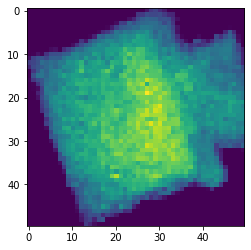

In [40]:
import matplotlib.pyplot as plt
plt.imshow(fn0[0].reshape(50,50))
plt.show()

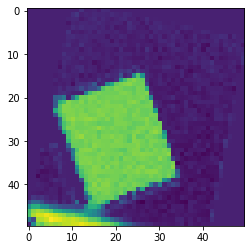

In [91]:
plt.imshow(fn0[16].reshape((50,50)))
plt.show()

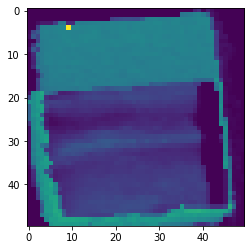

In [42]:
plt.imshow(fn0[5,:].reshape((50,50)))
plt.show()

###  False positive 0

In [43]:
fp0 = np.setdiff1d(class0, true0)
fp0 = X_eval[fp0,:]

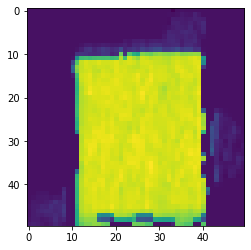

In [47]:
plt.imshow(fp0[0,:].reshape((50,50)))
plt.show()

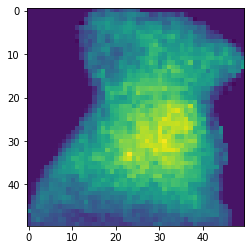

In [48]:
plt.imshow(fp0[1,:].reshape((50,50)))
plt.show()

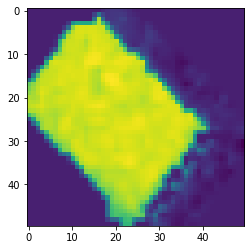

In [49]:
plt.imshow(fp0[2,:].reshape((50,50)))
plt.show()

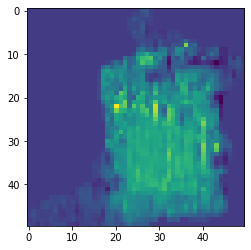

In [50]:
plt.imshow(fp0[3,:].reshape((50,50)))
plt.show()

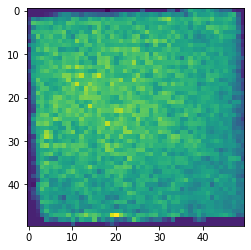

In [51]:
plt.imshow(fp0[4,:].reshape((50,50)))
plt.show()

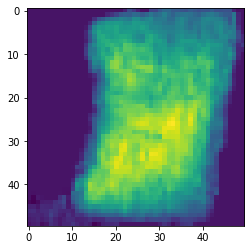

In [52]:
plt.imshow(fp0[5,:].reshape((50,50)))
plt.show()

### False negative 1

In [53]:
fn1 = np.setdiff1d( true1, class1)
fn1 = X_eval[fn1,:]

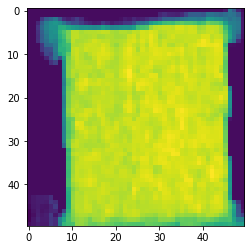

In [54]:
plt.imshow(fn1[0,:].reshape((50,50)))
plt.show()

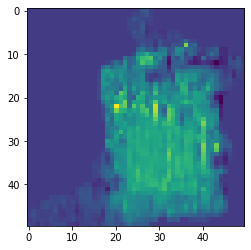

In [55]:
plt.imshow(fn1[2,:].reshape((50,50)))
plt.show()

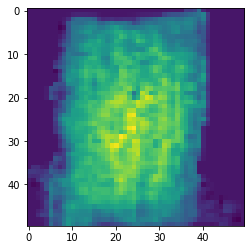

In [56]:
plt.imshow(fn1[3,:].reshape((50,50)))
plt.show()

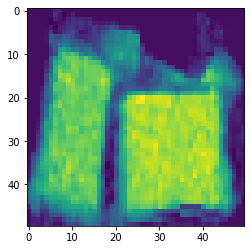

In [57]:
plt.imshow(fn1[4,:].reshape((50,50)))
plt.show()

### False positive 1

In [58]:
fp1 = np.setdiff1d(class1, true1)
fp1 = X_eval[fp1,:]

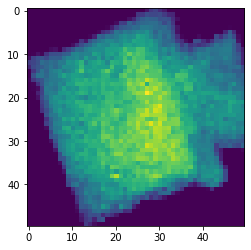

In [59]:
plt.imshow(fp1[0,:].reshape((50,50)))
plt.show()

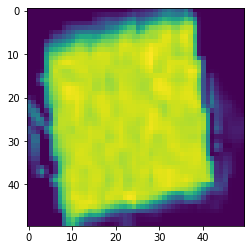

In [60]:
plt.imshow(fp1[1,:].reshape((50,50)))
plt.show()

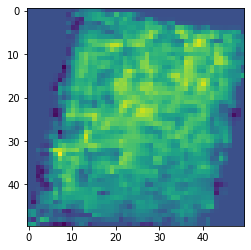

In [61]:
plt.imshow(fp1[2,:].reshape((50,50)))
plt.show()

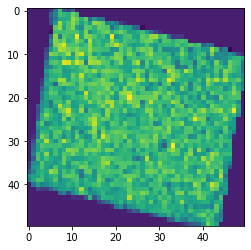

In [62]:
plt.imshow(fp1[3,:].reshape((50,50)))
plt.show()

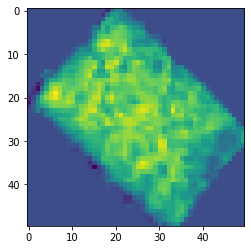

In [63]:
plt.imshow(fp1[4,:].reshape((50,50)))
plt.show()

### False negative 2

In [64]:
fn2 = np.setdiff1d(true2, class2)
fn2 = X_eval[fn2,:]

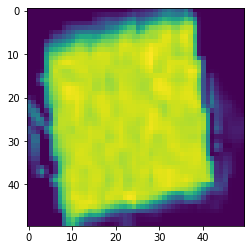

In [65]:
plt.imshow(fn2[0,:].reshape((50,50)))
plt.show()

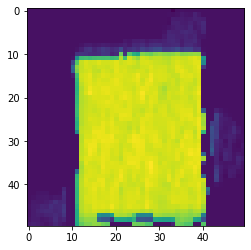

In [66]:
plt.imshow(fn2[1,:].reshape((50,50)))
plt.show()

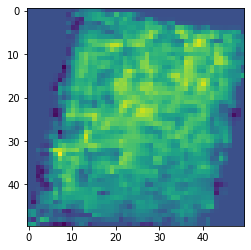

In [67]:
plt.imshow(fn2[2,:].reshape((50,50)))
plt.show()

### False positive 2

In [68]:
fp2 = np.setdiff1d(class2, true2)
fp2 = X_eval[fp2,:]

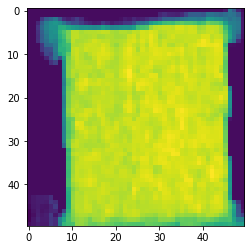

In [69]:
plt.imshow(fp2[0,:].reshape((50,50)))
plt.show()

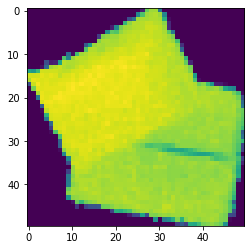

In [70]:
plt.imshow(fp2[1,:].reshape((50,50)))
plt.show()

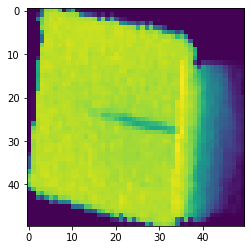

In [71]:
plt.imshow(fp2[3,:].reshape((50,50)))
plt.show()

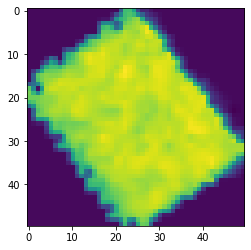

In [72]:
plt.imshow(fp2[4,:].reshape((50,50)))
plt.show()